<a href="https://colab.research.google.com/github/rich-hyun/5th-Static-Competition/blob/main/static_jaehyun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터

In [1]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/rich-hyun/5th-Static-Competition/main/Urban%20Air%20Quality%20and%20Health%20Impact%20Dataset.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
data.head()


,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1725692400,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9,Fall,Saturday,True,10.522170
1,2024-09-08,1725778800,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9,Fall,Sunday,True,10.062332
2,2024-09-09,1725865200,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9,Fall,Monday,False,9.673387
3,2024-09-10,1725951600,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9,Fall,Tuesday,False,9.411519
4,2024-09-11,1726038000,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9,Fall,Wednesday,False,9.515179


In [2]:
# 데이터 전처리 및 시계열 데이터 준비

# 'datetime' 컬럼을 datetime 형식으로 변환 후 인덱스로 설정
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# 결측값 확인 및 처리
# 우선 결측값이 있는지 확인
missing_values = data.isnull().sum()

# 온도와 관련된 주요 변수들만 선택하여 사용 (온도, 습도, 기온지수 등)
selected_columns = ['tempmax', 'tempmin', 'temp', 'feelslike', 'humidity', 'Heat_Index', 'Health_Risk_Score']

# 결측값을 선형 보간법으로 처리
data[selected_columns] = data[selected_columns].interpolate(method='linear')

# 시계열 데이터의 첫 몇 줄 확인
data[selected_columns].head()

,tempmax,tempmin,temp,feelslike,humidity,Heat_Index,Health_Risk_Score
datetime,,,,,,,
2024-09-07,106.1,91.0,98.5,95.9,21.0,95.918703,10.522170
2024-09-08,103.9,87.0,95.4,92.3,21.5,92.281316,10.062332
2024-09-09,105.0,83.9,94.7,90.6,16.9,90.599165,9.673387
2024-09-10,106.1,81.2,93.9,89.8,15.7,89.638811,9.411519
2024-09-11,106.1,82.1,94.0,90.0,15.9,89.760414,9.515179


#LSTM

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1141 - val_loss: 0.0517
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0544 - val_loss: 0.0495
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0499 - val_loss: 0.0495
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0494 - val_loss: 0.0499
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0492 - val_loss: 0.0495
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0517 - val_loss: 0.0497
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0506 - val_loss: 0.0511
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0528 - val_loss: 0.0497
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0506 - val_loss: 0.0512
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0514 - val_loss: 0.0497
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0500 - val_loss: 0.0494
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0515 - val_l

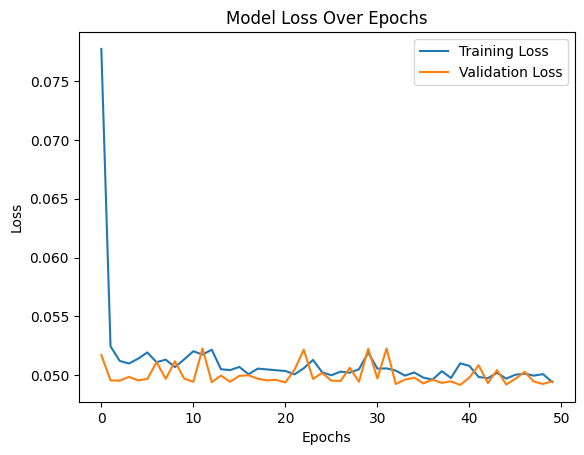

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 사용할 변수와 타겟 변수 (Health_Risk_Score) 설정
features = ['tempmax', 'tempmin', 'temp', 'feelslike', 'humidity', 'Heat_Index']
target = 'Health_Risk_Score'

# 데이터 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features + [target]])

# 시계열 데이터 준비
sequence_length = 10
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, :-1])
    y.append(scaled_data[i + sequence_length, -1])

X, y = np.array(X), np.array(y)

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 훈련
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# 학습 손실값 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 예측값 계산
y_pred = model.predict(X)

# 스케일링을 되돌림
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X[:, -1, :], y_pred), axis=1))[:, -1]
y_true_rescaled = scaler.inverse_transform(np.concatenate((X[:, -1, :], y.reshape(-1, 1)), axis=1))[:, -1]

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true_rescaled, y_pred_rescaled))
print(f"RMSE: {rmse}")

# MAE 계산
mae = mean_absolute_error(y_true_rescaled, y_pred_rescaled)
print(f"MAE: {mae}")

# R² 계산
r2 = r2_score(y_true_rescaled, y_pred_rescaled)
print(f"R²: {r2}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
RMSE: 0.6635288964723461
MAE: 0.5542011828211989
R²: 0.05028411140701827


#GRU

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# GRU 모델 구축
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_gru.add(GRU(50))
model_gru.add(Dense(1))

# 모델 컴파일
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 훈련
history_gru = model_gru.fit(X, y, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# 예측값 계산
y_pred_gru = model_gru.predict(X)

# 스케일링을 되돌림
y_pred_rescaled_gru = scaler.inverse_transform(np.concatenate((X[:, -1, :], y_pred_gru), axis=1))[:, -1]
y_true_rescaled_gru = scaler.inverse_transform(np.concatenate((X[:, -1, :], y.reshape(-1, 1)), axis=1))[:, -1]

# RMSE 계산
rmse_gru = np.sqrt(mean_squared_error(y_true_rescaled_gru, y_pred_rescaled_gru))
print(f"GRU RMSE: {rmse_gru}")

# MAE 계산
mae_gru = mean_absolute_error(y_true_rescaled_gru, y_pred_rescaled_gru)
print(f"GRU MAE: {mae_gru}")

# R² 계산
r2_gru = r2_score(y_true_rescaled_gru, y_pred_rescaled_gru)
print(f"GRU R²: {r2_gru}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1380 - val_loss: 0.0559
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0548 - val_loss: 0.0494
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0548 - val_loss: 0.0488
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0524 - val_loss: 0.0486
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0492 - val_loss: 0.0487
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0516 - val_loss: 0.0486
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0520 - val_loss: 0.0488
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0494 - val_loss: 0.0495
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0565 - val_loss: 0.0489
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0497 - val_loss: 0.0490
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0525 - val_loss: 0.0488
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0

#1D

In [7]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# 1D CNN 모델 구축
model_cnn = Sequential()

# 1D Conv 레이어 추가
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())

# 출력 레이어
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))

# 모델 컴파일
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 훈련
history_cnn = model_cnn.fit(X, y, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# 예측값 계산
y_pred_cnn = model_cnn.predict(X)

# 스케일링을 되돌림
y_pred_rescaled_cnn = scaler.inverse_transform(np.concatenate((X[:, -1, :], y_pred_cnn), axis=1))[:, -1]
y_true_rescaled_cnn = scaler.inverse_transform(np.concatenate((X[:, -1, :], y.reshape(-1, 1)), axis=1))[:, -1]

# RMSE 계산
rmse_cnn = np.sqrt(mean_squared_error(y_true_rescaled_cnn, y_pred_rescaled_cnn))
print(f"CNN RMSE: {rmse_cnn}")

# MAE 계산
mae_cnn = mean_absolute_error(y_true_rescaled_cnn, y_pred_rescaled_cnn)
print(f"CNN MAE: {mae_cnn}")

# R² 계산
r2_cnn = r2_score(y_true_rescaled_cnn, y_pred_rescaled_cnn)
print(f"CNN R²: {r2_cnn}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1275 - val_loss: 0.0523
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0550 - val_loss: 0.0506
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - val_loss: 0.0528
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - val_loss: 0.0506
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0498 - val_loss: 0.0491
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0490 - val_loss: 0.0491
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0498 - val_loss: 0.0489
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0483 - val_loss: 0.0493
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0456 - val_loss: 0.0492
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0474 - val_loss: 0.0501
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0486 - val_loss: 0.0497
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0466 - val

#LSTM+CNN 하이브리드

In [8]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense

# LSTM + 1D CNN 하이브리드 모델 구축
model_hybrid = Sequential()

# 1D CNN 레이어 추가
model_hybrid.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model_hybrid.add(MaxPooling1D(pool_size=2))

# LSTM 레이어 추가
model_hybrid.add(LSTM(50, return_sequences=False))

# 출력 레이어
model_hybrid.add(Dense(50, activation='relu'))
model_hybrid.add(Dense(1))

# 모델 컴파일
model_hybrid.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 훈련
history_hybrid = model_hybrid.fit(X, y, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# 예측값 계산
y_pred_hybrid = model_hybrid.predict(X)

# 스케일링을 되돌림
y_pred_rescaled_hybrid = scaler.inverse_transform(np.concatenate((X[:, -1, :], y_pred_hybrid), axis=1))[:, -1]
y_true_rescaled_hybrid = scaler.inverse_transform(np.concatenate((X[:, -1, :], y.reshape(-1, 1)), axis=1))[:, -1]

# RMSE 계산
rmse_hybrid = np.sqrt(mean_squared_error(y_true_rescaled_hybrid, y_pred_rescaled_hybrid))
print(f"Hybrid RMSE: {rmse_hybrid}")

# MAE 계산
mae_hybrid = mean_absolute_error(y_true_rescaled_hybrid, y_pred_rescaled_hybrid)
print(f"Hybrid MAE: {mae_hybrid}")

# R² 계산
r2_hybrid = r2_score(y_true_rescaled_hybrid, y_pred_rescaled_hybrid)
print(f"Hybrid R²: {r2_hybrid}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0724 - val_loss: 0.0515
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0520 - val_loss: 0.0512
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0541 - val_loss: 0.0525
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - val_loss: 0.0497
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - val_loss: 0.0503
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0516 - val_loss: 0.0540
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0534 - val_loss: 0.0498
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - val_loss: 0.0495
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0515 - val_loss: 0.0509
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0500 - val_loss: 0.0494
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0490 - val_loss: 0.0529
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0531 - val